## 实验介绍

### 1.实验内容

本实验介绍PCA算法。并实现基于PCA算法的半导体制造数据降维 。

### 2.实验目标

通过本实验掌握PCA算法。

### 3.实验知识点

* PCA算法

### 4.实验环境

* python 3.6.5
* sklearn 0.19.1
* CourseGrading在线实验环境

### 5.预备知识

* 初等数学知识
* Linux命令基本操作
* Python编程基础
* kNN算法原理


## 准备工作

点击屏幕右上方的下载实验数据模块，选择下载pca_semi_cond.tgz到指定目录下，然后再依次选择点击上方的File->Open->Upload,上传刚才下载的数据集压缩包，再使用如下命令解压：

In [1]:
!tar -zxvf pca_semi_cond.tgz

pca_semi_cond/
pca_semi_cond/secom.data


## 【实验】利用PCA对半导体制造数据降维 
我们知道，像集成电路这样的半导体，成本非常昂贵。如果能在制造过程中尽早和尽快地检测出是否出现瑕疵，将可能为企业节省大量的成本和时间。那么，我们在面对大规模和高维度数据集时，显然计算损耗会很大，无疑会非常耗时。所以，如果利用PCA等降维技术将高维的数据特征进行降维处理，保留那些最重要的数据特征，舍弃那些可以忽略的特征，将大大加快我们的数据处理速度和计算损耗，为企业节省不小的时间和成本。

## 【实验】数据缺失值的问题 

显然，数据集中可能会包含很多缺失值，这些缺失值是以NaN进行标识的。那么如何对待这些缺失值呢？如果存在大量的样本存在缺失值，显然选择将这些有缺失值得样本丢弃不可取；此外，由于并不知道这些值的意义，选择将缺失值替换为0也不是一个很好的决定。所以，这里我们选择将数据集中的特征缺失值，用数据集中该维度所有非NaN特征的均值进行替换。相比之下，采用均值替换的方法在这里是一个相对较好的选择。数据集来自UCI机器学习数据库，包含590个特征，其中几乎所有样本都存在特征缺失，用NaN表示，通过replaceNanWithMean将缺失的NaN数据用其他样本的相同特征值平均值填充。添加如下代码：

In [5]:
from numpy import *
import matplotlib.pyplot as plt
"""
函数说明：加载数据集
parameters:
    fileName -文件名
    delim -分隔符
return:
    mat(datArr) -数据矩阵
"""
def loadDataSet(fileName, delim = '\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]      #对读入数据以\t分隔存储到列表中
    datArr = [list(map(float,line)) for line in stringArr]   #使用两个list来构建矩阵
    return mat(datArr)
"""
函数说明：PCA算法实现
parameters:
    dataMat -用于进行PCA操作的数据集
    topNfeat -应用的N个特征
return:
    lowDataMat -将维后的数据集
    reconMat -重构的数据集（用于调试）
"""
def pca(dataMat, topNfeat = 9999999):
    meanVals = mean(dataMat, axis = 0)  #计算数据平均值
    meanRemoved = dataMat - meanVals    #去中心化
    covMat = cov(meanRemoved, rowvar = 0 ) #计算协方差
    eigVals, eigVects = linalg.eig(mat(covMat)) #计算协方差矩阵的特征值和特征向量
    eigValInd = argsort(eigVals) #对特征值从小到大排序，并提取对应的index
    eigValInd = eigValInd[:-(topNfeat+1):-1]    #对特征排序结果逆序
    redEigVects = eigVects[:,eigValInd]     #根据特征值排序结果得到topNfeat个最大的特征向量
    lowDataMat = meanRemoved * redEigVects              #数据降维
    reconMat = (lowDataMat * redEigVects.T) + meanVals  #数据重构（对比上面的计算公式）
    return lowDataMat, reconMat
"""
函数说明：绘制数据集
parameters:
    dataMat -原始数据集
    reconMat -重构数据集
return:
    None
"""
def drawDataSet(dataMat, reconMat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:,1].flatten().A[0], marker='^',s=90)
    ax.scatter(reconMat[:,0].flatten().A[0], reconMat[:,1].flatten().A[0], marker='o',s=50,c='red')
    plt.show()
    
def replaceNanWithMean():
    datMat = loadDataSet('pca_semi_cond/secom.data',' ')
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
        meanVal = mean(datMat[nonzero(~isnan(datMat[:,i].A))[0],i])     #计算每个特征项的均值
        datMat[nonzero(isnan(datMat[:,i].A))[0],i] = meanVal    #将空值替换为均值
    return datMat

这样，我们就去除了所有NaN特征，接下来就可以对数据集利用PCA算法进行降维处理了。修改main函数为：

协方差矩阵的特征值结果：
 [  5.34151979e+07   2.17466719e+07   8.24837662e+06   2.07388086e+06
   1.31540439e+06   4.67693557e+05   2.90863555e+05   2.83668601e+05
   2.37155830e+05   2.08513836e+05   1.96098849e+05   1.86856549e+05
   1.52422354e+05   1.13215032e+05   1.08493848e+05   1.02849533e+05
   1.00166164e+05   8.33473762e+04   8.15850591e+04   7.76560524e+04
   6.66060410e+04   6.52620058e+04   5.96776503e+04   5.16269933e+04
   5.03324580e+04   4.54661746e+04   4.41914029e+04   4.15532551e+04
   3.55294040e+04   3.31436743e+04   2.67385181e+04   1.47123429e+04
   1.44089194e+04   1.09321187e+04   1.04841308e+04   9.48876548e+03
   8.34665462e+03   7.22765535e+03   5.34196392e+03   4.95614671e+03
   4.23060022e+03   4.10673182e+03   3.41199406e+03   3.24193522e+03
   2.74523635e+03   2.35027999e+03   2.16835314e+03   1.86414157e+03
   1.76741826e+03   1.70492093e+03   1.66199683e+03   1.53948465e+03
   1.33096008e+03   1.25591691e+03   1.15509389e+03   1.12410108e+03
   1.03213798e+03   

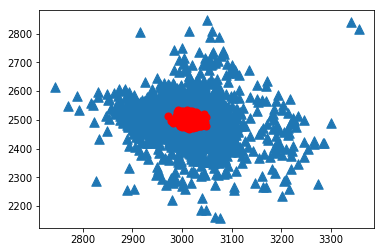

In [6]:
if __name__ =='__main__':
    dataMat = replaceNanWithMean()
    #pca部分代码
    meanVals = mean(dataMat, axis = 0)  #计算数据平均值
    meanRemoved = dataMat - meanVals    #去平均值
    covMat = cov(meanRemoved, rowvar = 0 ) #计算协方差
    eigVals, eigVects = linalg.eig(mat(covMat))
    print("协方差矩阵的特征值结果：\n",eigVals)
    #总步骤
    lowDMat, reconMat = pca(dataMat,17)
    print("降维后的矩阵形状：\n",shape(lowDMat))
    drawDataSet(dataMat, reconMat)

从上面的特征值结果，我们可以看到如下几个重要信息：

    （1）里面有很多值都是0，这意味着这些特征都是其他特征的副本，都可以通过其他特征来表示，其本身没有提供额外的信息。
    （2）可以看到最前面的15个特征值得数量级都大于10e+4，而后面的特征值都变得非常小。这表明，所有特征中只有部分特征是重要特征。

## 【实验】运行结果 
下图示出了数据集前20个主成分占总方差的百分比：
![](1_pca_semi_cond.jpg)  
可以看出，数据的绝大部分方差都包含在前面的几个主成分中，舍弃后面的主成分并不会损失太多的信息。如果只保留前面几个最重要的主成分，那么在保留了绝大部分信息的基础上，可以将数据集特征压缩到一个非常低的程度，显然大大提高了计算效率。

下表是数据集前20个主成分所占的总方差百分比，以及累计方差百分比：
![](2_pca_semi_cond.png)
由上表可以看出，前六个主成分覆盖了数据96.8%的方差，前二十个主成分覆盖了99.3%的方差。这表明，通过特征值分析，我们可以确定出需要保留的主成分及其个数，在数据集整体信息（总方差）损失很小的情况下，我们可以实现数据的大幅度降维。

看下我们取前20个主成分的数据压缩结果：
![](3_pca_semi_cond.png)
一旦，通过特征值分析知道了需要保留的主成分个数，那么我们就可以通过pca函数，设定合适的N值，使得函数最终将数据特征降低到最佳的维度。对数据进行降维后，我们就可以对剩余的数据特征进行机器学习算法的分类。

## 实验总结

降维技术使数据更易使用，并且它们往往能够去除数据中的噪声，通常作为预处理步骤，在算法应用前清洗数据。PCA可以从数据中识别主要特征，它通过沿着数据最大方差方向旋转坐标轴实现。

通过学习本节的实验，您应该能达到以下两个目标：

        1. 掌握PCA算法。
        2. 学会实现该算法处理数据降维问题。

##  参考文献及延伸阅读 

### 参考资料：

1.哈林顿，李锐. 机器学习实战 : Machine learning in action[M]. 人民邮电出版社, 2013.  
2.周志华. 机器学习:Machine learning[M]. 清华大学出版社, 2016.

### 延伸阅读：

1.李航. 统计学习方法[M]. 清华大学出版社, 2012.